In [39]:
from plot import *
from gen import *
# from load_data import *  
from func_tools import *
from AGM import *
from GM import *
from BFGS import *
from LBFGS import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [37]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

### 生成随机数

In [41]:
# 这里使用默认的参数，按照均匀分布的中心点
# TODO: task 上说可以尝试有趣的pattern，我们可以手动给定centroid再生成周围点，详见 gen.py 的文档
centroids, points, N = gen_data() 


In [42]:
y_true = np.repeat(np.arange(len(N)),N)
len(y_true)

87

In [43]:
len(points)

87

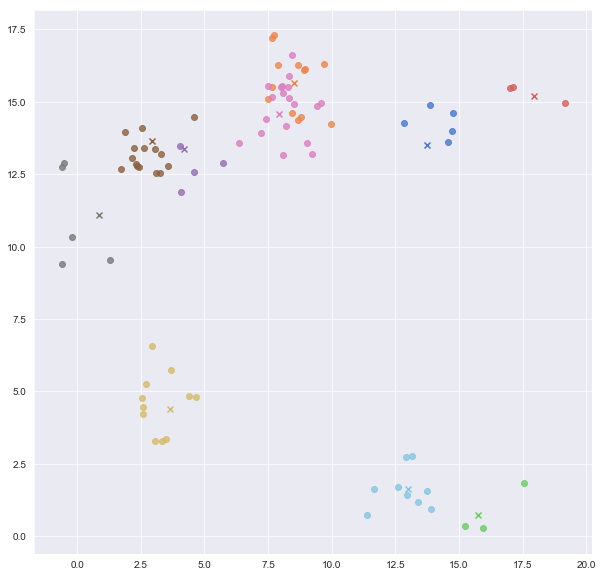

In [44]:
# 简单画个图
plt.figure(figsize=(10,10))
plot_generated_data(centroids, points, N)

In [45]:
len(points)

87

## AGM Sample

In [46]:
lbd = 0.05
delta = 1e-3
n = len(points)
step = step_size(n,lbd,delta)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)

In [47]:
ans,AGM_loss = AGM(grad,points,step,0.005)

Iter: 1
norm(gX): 25.37348552958234
Iter: 2
norm(gX): 25.367593164300065
Iter: 3
norm(gX): 25.36004233971449
Iter: 4
norm(gX): 25.350876433742965
Iter: 5
norm(gX): 25.34012269592468
Iter: 6
norm(gX): 25.327800358088258
Iter: 7
norm(gX): 25.31392405851996
Iter: 8
norm(gX): 25.29850556719863
Iter: 9
norm(gX): 25.28155475835447
Iter: 10
norm(gX): 25.263080203617797
Iter: 11
norm(gX): 25.243089555612656
Iter: 12
norm(gX): 25.221589807585065
Iter: 13
norm(gX): 25.19858747565082
Iter: 14
norm(gX): 25.174088730602733
Iter: 15
norm(gX): 25.148099495640665
Iter: 16
norm(gX): 25.120625520375963
Iter: 17
norm(gX): 25.091672437887357
Iter: 18
norm(gX): 25.061245809397192
Iter: 19
norm(gX): 25.02935115972775
Iter: 20
norm(gX): 24.995994005771692
Iter: 21
norm(gX): 24.96117987958791
Iter: 22
norm(gX): 24.924914347305055
Iter: 23
norm(gX): 24.8872030247142
Iter: 24
norm(gX): 24.84805159021705
Iter: 25
norm(gX): 24.80746579564002
Iter: 26
norm(gX): 24.765451475309657
Iter: 27
norm(gX): 24.722014553699

In [65]:
groups = get_group(ans, tol=1.5)

In [64]:
groups

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
purity_score(y_true,groups)

0.6091954022988506

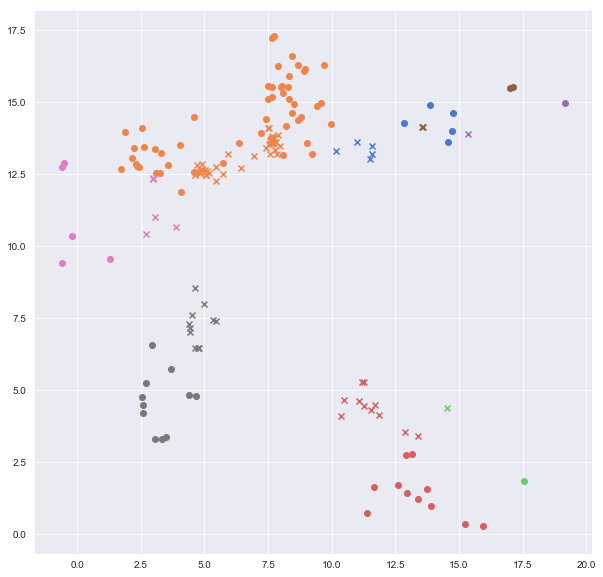

In [66]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups)

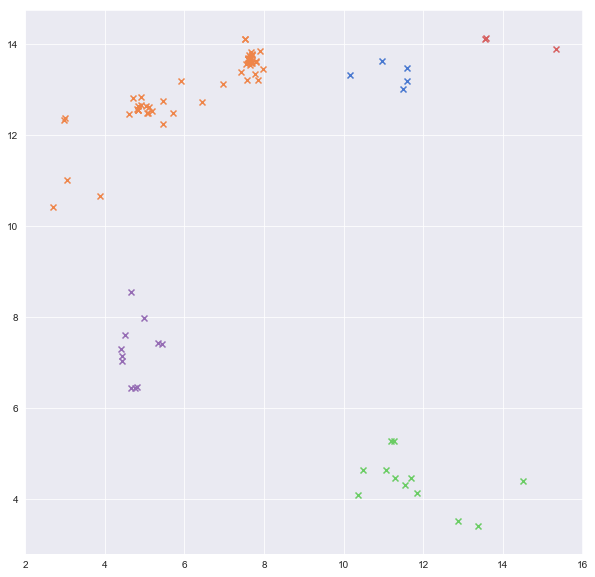

In [9]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='ans')

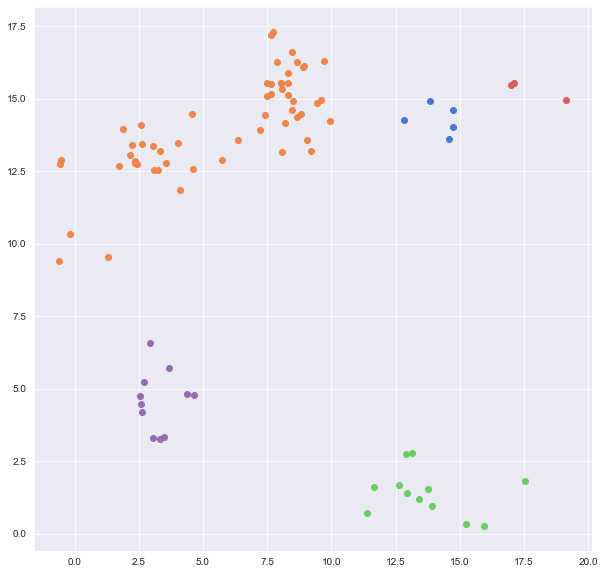

In [10]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='points')

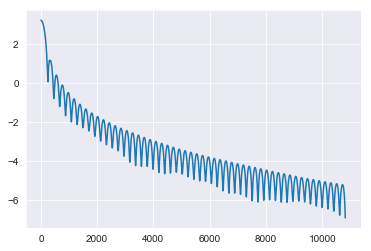

In [10]:
plt.plot(np.log(AGM_loss))

## GM Sample

In [5]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans2,GM_loss = GM(points,func,grad,1e-2)

Iter: 1
norm(gX): 787.3309095574176
step size: 0.5
Iter: 2
norm(gX): 717.3207051746559
step size: 0.25
Iter: 3
norm(gX): 869.1680177536285
step size: 0.25
Iter: 4
norm(gX): 579.8730414339898
step size: 0.125
Iter: 5
norm(gX): 728.0916829373107
step size: 0.125
Iter: 6
norm(gX): 554.2331149835528
step size: 0.0625
Iter: 7
norm(gX): 644.0911262687881
step size: 0.0625
Iter: 8
norm(gX): 490.7951170084344
step size: 0.03125
Iter: 9
norm(gX): 614.2029671615845
step size: 0.03125
Iter: 10
norm(gX): 480.3019755973577
step size: 0.015625
Iter: 11
norm(gX): 600.0163216324485
step size: 0.015625
Iter: 12
norm(gX): 453.4114706121287
step size: 0.0078125
Iter: 13
norm(gX): 590.9166428070558
step size: 0.0078125
Iter: 14
norm(gX): 447.1984898984225
step size: 0.00390625
Iter: 15
norm(gX): 581.2975891147249
step size: 0.00390625
Iter: 16
norm(gX): 435.8330126203057
step size: 0.001953125
Iter: 17
norm(gX): 571.908383524523
step size: 0.001953125
Iter: 18
norm(gX): 429.7044438212493
step size: 0.0009

KeyboardInterrupt: 

In [39]:
len(GM_loss)

364

In [5]:
groups = get_group(ans2, tol=2)

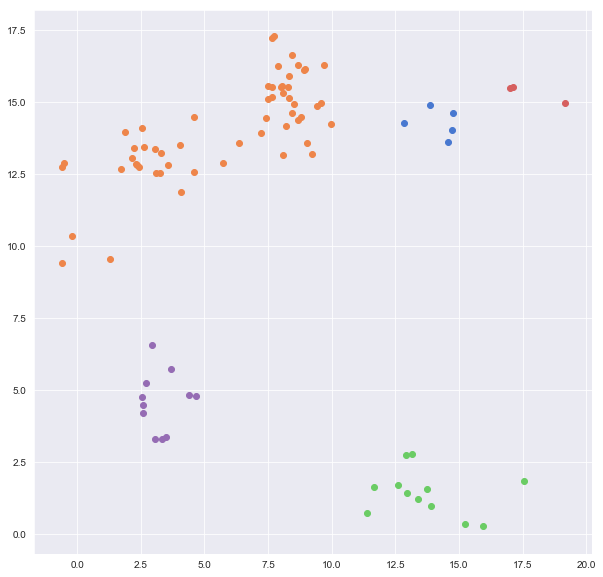

In [6]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans2,groups,way='points')

In [7]:
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})

Text(0.5,0,'Iters')

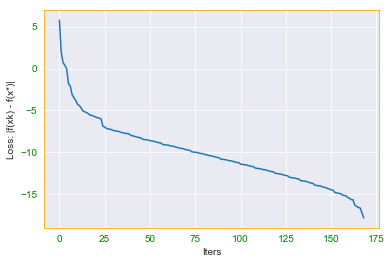

In [8]:
plt.plot(np.log(GM_loss - GM_loss[len(GM_loss)-1]))
plt.ylabel("Loss: |f(xk) - f(x*)|")
plt.xlabel("Iters")

## GM_BB Sample

In [37]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_BB,GM_BB_loss = GM_BB(points,func,grad,1e-5)

In [40]:
len(GM_BB_loss)

152

In [24]:
groups = get_group(ans_BB, tol=2)

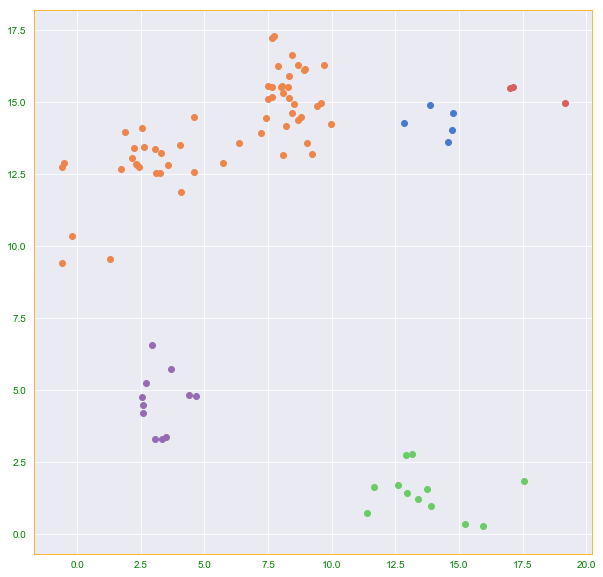

In [20]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans_BB,groups,way='points')

In [31]:
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})

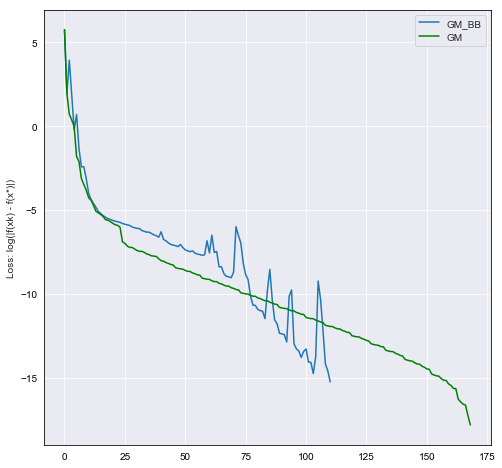

In [34]:
plt.figure(figsize=(8,8))
plt.ylabel("Loss: log(|f(xk) - f(x*)|)")
plt.plot(np.log(GM_BB_loss - GM_BB_loss[len(GM_BB_loss)-1]),label="GM_BB")
plt.plot(np.log(GM_loss - GM_loss[len(GM_loss)-1]),color="green",label="GM")
plt.legend()
plt.savefig("D:\Study\MDS\Term 1\Optimization\Final\Figure\BB_GM_Loss")
plt.show()

## BFGS
tol=0.03 is quite almost minimum, if smaller s.y is too small 1/s.y=nan

In [5]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_BFGS,BFGS_loss = BFGS(points,func,grad,0.003)

nomr_2: 9.668224538359638
s.T.dot(y): 701.5651720961256
alpha: 0.5
alpha: 0.25
nomr_2: 3.247738361943829
s.T.dot(y): 24.678406178873377
alpha: 0.5
nomr_2: 1.7096200287469712
s.T.dot(y): 2.866165799370821
alpha: 0.5
nomr_2: 1.451120877859875
s.T.dot(y): 0.8518010608893598
alpha: 0.5
nomr_2: 1.331676711032868
s.T.dot(y): 0.6431933240655382
alpha: 0.5
alpha: 0.25
nomr_2: 0.9838595410518371
s.T.dot(y): 0.24966947673657425
alpha: 0.5
alpha: 0.25
nomr_2: 0.8295665012864109
s.T.dot(y): 0.16784448492146117
alpha: 0.5
alpha: 0.25
nomr_2: 0.7619401713145493
s.T.dot(y): 0.14290905788337285
alpha: 0.5
alpha: 0.25
nomr_2: 0.8659924331764195
s.T.dot(y): 0.13342807008668855
alpha: 0.5
alpha: 0.25
nomr_2: 0.6028649498770787
s.T.dot(y): 0.08628937686481358
alpha: 0.5
alpha: 0.25
nomr_2: 0.6851670646316601
s.T.dot(y): 0.06843983811339856
alpha: 0.5
alpha: 0.25
nomr_2: 0.6120160927517656
s.T.dot(y): 0.06795025871397452
alpha: 0.5
alpha: 0.25
nomr_2: 0.4952353563061624
s.T.dot(y): 0.04510948691830842
alph

In [6]:
groups = get_group(ans_BFGS, tol=2)

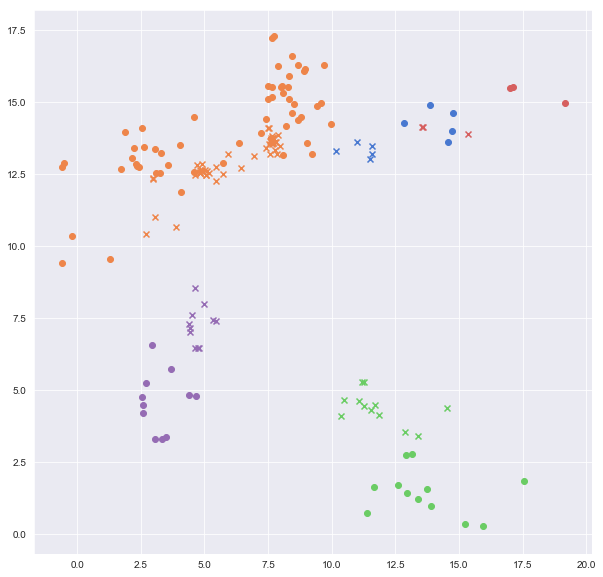

In [7]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans_BFGS,groups)

In [8]:
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})

In [15]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(BFGS_loss - BFGS_loss[len(BFGS_loss)-1]))
plt.show()

NameError: name 'BFGS_loss' is not defined

<Figure size 360x360 with 0 Axes>

## LBFGS
tol=0.03 is quite almost minimum, if smaller s.y is too small 1/s.y=nan

In [5]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_LBFGS,LBFGS_loss = LBFGS(points,func,grad,0.003,1,5)

step_size: 1
s.T.dot(y): 701.5651720961255
Iter: 0
norm_2:  9.668224538359638
step_size: 0.25
s.T.dot(y): 21.13910379007497
Iter: 1
norm_2:  2.6420205372295418
step_size: 1
s.T.dot(y): 0.9512111077628872
Iter: 2
norm_2:  1.7725003900152791
step_size: 1
s.T.dot(y): 0.29449477430825
Iter: 3
norm_2:  1.5708180499735216
step_size: 1
s.T.dot(y): 0.1073091717777479
Iter: 4
norm_2:  1.5237389240759862
step_size: 1
s.T.dot(y): 0.0035204853683236136
Iter: 5
norm_2:  1.5179144358211984
step_size: 1
s.T.dot(y): 0.13222025552239955
Iter: 6
norm_2:  1.0306917144499643
step_size: 1
s.T.dot(y): 0.22353121139016216
Iter: 7
norm_2:  1.0906907486611013
step_size: 1
s.T.dot(y): 0.04653016089473028
Iter: 8
norm_2:  1.0257535734004362
step_size: 1
s.T.dot(y): 0.03135836533694491
Iter: 9
norm_2:  0.9652394217607453
step_size: 1
s.T.dot(y): 0.008231233120747222
Iter: 10
norm_2:  0.9654259306796656
step_size: 1
s.T.dot(y): 0.5462815982150803
Iter: 11
norm_2:  1.5170228582589298
step_size: 1
s.T.dot(y): 0.0809

In [11]:
groups = get_group(ans_LBFGS, tol=2)

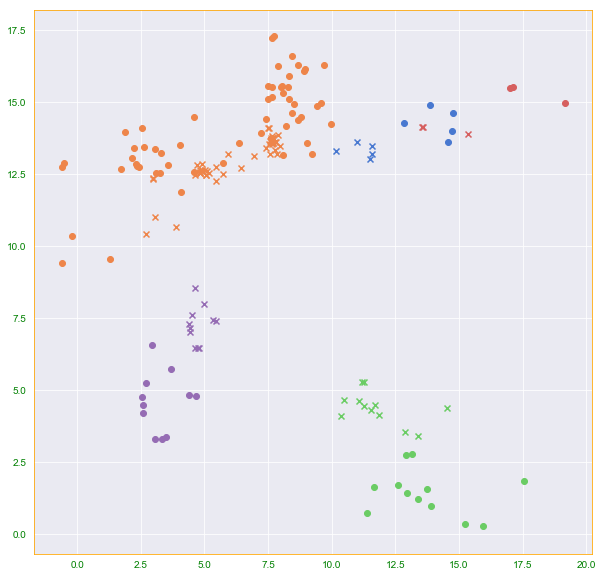

In [12]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans_LBFGS,groups)

In [13]:
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})

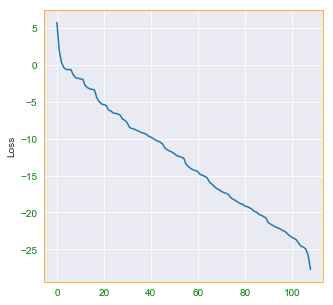

In [14]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(LBFGS_loss - LBFGS_loss[len(LBFGS_loss)-1]))
plt.show()

## 计算Hessian

In [114]:
from itertools import combinations
def huber(x, delta):
    '''
    Args:
        x: input that has been norm2ed (n*(n-1)/2,)
        delta: threshold
    Output:
        (n*(n-1)/2,)
    '''
    return np.where(x > delta ** 2, np.sqrt(x) - delta / 2, x / (2 * delta))


def pair_col_diff_norm2(x, idx):
    '''
    compute norm2 of pairwise column difference
    Args:
        x: (d, n)
        idx: (n*(n - 1)/2, 2), used to indexing pairwise column combinations
    Output:
        (n*(n-1)/2,)
    '''
    x = x[:, idx]  # (d, n*(n - 1)/2, 2)
    x = np.diff(x, axis=-1).squeeze()  # (d, n*(n-1)/2)
    x = np.sum(x ** 2, axis=0)  # (n*(n-1)/2,)
    return x


def pair_col_diff_sum(x, t, idx):
    '''
    compute sum of pairwise column difference
    Args:
        x: (d, n)
        t: (d, n)
        idx: (n*(n - 1)/2, 2), used to indexing pairwise column combinations
    Output:
        (n*(n-1)/2,)
    '''
    x = np.diff(x[:, idx], axis=-1).squeeze()  # (d, n*(n-1)/2)
    t = np.diff(t[:, idx], axis=-1).squeeze()  # (d, n*(n-1)/2)
    return np.sum(x * t, axis=0)  # (n*(n-1)/2,)


class OBJ:
    def __init__(self, d, n, delta):
        '''
        a: training data samples of shape (d, n)
        '''
        self.d = d
        self.n = n
        self.delta = delta
        self.idx = np.array(list(combinations(list(range(n)), 2)))
        self.triu_idx = np.triu_indices(self.n, 1)

    def __call__(self, x, a, lamb):
        '''
        Args:
            x: (d, n)
            a: (d, n)
            lamb: control effect of regularization
        Output:
            scalar
        '''
        v = np.sum((x - a) ** 2) / 2
        v += lamb * np.sum(huber(pair_col_diff_norm2(x, self.idx), self.delta))
        return v

    def grad(self, x, a, lamb):
        '''
        gradient
        Output:
            (d, n)
        '''
        g = x - a
        diff_norm2 = pair_col_diff_norm2(x, self.idx)  # (n*(n-1)/2,)
        tmp = np.zeros((self.n, self.n))
        tmp[self.triu_idx] = diff_norm2
        tmp += tmp.T  # (n, n)
        mask = (tmp > self.delta ** 2)
        tmp = np.where(mask,
                       np.divide(1, np.sqrt(tmp), where=mask),
                       0)
        x = x.T
        g = g + lamb * (tmp.sum(axis=1, keepdims=True) * x - tmp @ x).T
        tmp = 1 - mask
        g = g + lamb * (tmp.sum(axis=1, keepdims=True) * x - tmp @ x).T / self.delta
        return g.flatten()

    def hessiant(self, x, t, lamb):
        '''
        returns the result of hessian matrix dot product a vector t
        Args:
            t: (d, n)
        Output:
            (d, n)
        '''
        ht = 0
        ht += t
        diff_norm2 = pair_col_diff_norm2(x, self.idx)  # (n*(n-1)/2,)
        diff_sum = pair_col_diff_sum(x, t, self.idx)
        tmp = np.zeros((self.n, self.n))
        tmp[self.triu_idx] = diff_norm2
        tmp += tmp.T

        mask = (tmp > self.delta ** 2)
        tmp = np.where(mask,
                       np.divide(1, np.sqrt(tmp), where=mask),
                       0)
        t = t.T
        x = x.T
        ht += (lamb * (tmp.sum(axis=1, keepdims=True) * t - tmp @ t).T)
        # tmp1 = np.where(tmp1 > 0, tmp1 ** 3, 0)
        tmp = tmp ** 3
        tmp[self.triu_idx] *= diff_sum
        tmp[(self.triu_idx[1], self.triu_idx[0])] *= diff_sum
        ht -= lamb * (tmp.sum(axis=1, keepdims=True) * x - tmp @ x).T

        tmp = 1 - mask
        ht += (lamb * (tmp.sum(axis=1, keepdims=True) * t - tmp @ t).T / self.delta)
        return ht.flatten()

In [167]:
import numpy as np
# from numpy.lib.function_base import _delete_dispatcher

def Hessian_hub(X, p, delta, B):
  n = X.shape[0]; d = X.shape[1]
  res = np.zeros(n*d).reshape((n*d,1))
  for i in range(n):
    H_tmp = Hessian_rows(i,n,d,delta,B,X)
    res[i*d:(i+1)*d] = H_tmp.dot(p).reshape((d,1))
  return np.array(res)

def Hessian_rows(i,n,d,delta,B,X):#i从0开始
  I = np.identity(d)
  DF = np.tile((-1/delta) * np.identity(d), n)
  choose_BX = (B.T[i] != 0) #choose material Xi-Xk, n-1 in total
  DBX = B.dot(X)[choose_BX] 
  DBX[:i,:] = -DBX[:i,:]
  mask = np.linalg.norm(DBX, axis=1) > delta #find ||Xi-Xk|| which is greater than delta
  mask2 = np.tile(mask,(d,1)).T.reshape(1,-1)[0] #will be further use
  norm = np.linalg.norm(DBX[mask], axis=1) #Calculate the norm which is greater than delta (prepare for the left part of tmp)
  #prepare for the right part of tmp
  row = np.repeat(np.arange(n-1),d)
  col = np.arange((n-1)*d)
  DBX_trans = np.array(sps.csr_matrix((DBX.flatten(),(row,col)),shape=((n-1),(n-1)*d)).todense())

  tmp = -(np.tile(I,(1,len(norm)))/np.repeat(norm,d)) + \
    (DBX[mask].T.dot(DBX_trans[:,mask2]))/np.repeat(norm**3,d)
  #change the values of items whose norm are greater than delta
  DF[:,:i*d][:, mask2[:i*d]] = tmp[:,:i*d]
  DF[:,(i+1)*d:][:,mask2[i*d:]] = tmp[:,i*d:]
  z = np.zeros((d,d))
  DF[:,i*d:(i+1)*d] = z
  I_tmp = np.tile(I,(n,1))
  iblock_tmp = -DF.dot(I_tmp)
  DF[:,i*d:(i+1)*d] = iblock_tmp
  

  return np.array(DF)


In [152]:
i=1
n, d = 5,3
delta = 0.1
B = gen_B(n, sparse=False)
X = np.arange(n*d).reshape(n,d)
DBX = B.T.dot(B.dot(X))
p = np.arange(n*d).reshape((n*d,1))
# Hessian_hub(X, p, 0.1, B)
Hdn = Hessian_rows(i,n,d,delta,B,X)
Hdn[0].dot(p)


array([1.11022302e-16])

## 测试Hessian

In [166]:
n, d = 4,2
test = OBJ(d,n,0.1)
X = np.arange(n*d).reshape(n,d)
t = np.arange(n*d).reshape((d,n)).astype(float)
test.hessiant(X.T, t, 0.1)

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [160]:
test.hessiant(X.T, t, 0.1)

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [168]:
n, d = 4,2
delta = 0.1
X = np.arange(n*d).reshape(n,d)
B = gen_B(n, sparse=False)
p = np.arange(n*d).reshape((n*d,1))
Hessian_hub(X, p, delta, B)

array([[-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.]])

In [102]:
i=1
B = gen_B(n, sparse=False)
X = np.random.randn(n,d)
DBX = B.T.dot(B.dot(X))

In [88]:
i = 0
n, d = 5,3
delta = 0.1
B = gen_B(n, sparse=False)
X = np.random.randn(n,d)
DBX = B.T.dot(B.dot(X))

In [90]:
  I = np.identity(d)
  DF = np.tile((-1/delta) * np.identity(d), n)
  choose_BX = (B.T[i] != 0) #choose material Xi-Xk, n-1 in total
  DBX = B.dot(X)[choose_BX] 
  mask = np.linalg.norm(DBX, axis=1) > delta #find ||Xi-Xk|| which is greater than delta
  mask2 = np.tile(mask,(d,1)).T.reshape(1,-1)[0] #will be further use
  norm = np.linalg.norm(DBX[mask], axis=1) #Calculate the norm which is greater than delta (prepare for the left part of tmp)
  #prepare for the right part of tmp
  row = np.repeat(np.arange(n-1),d)
  col = np.arange((n-1)*d)
  DBX_trans = np.array(sps.csr_matrix((DBX.flatten(),(row,col)),shape=((n-1),(n-1)*d)).todense())

  tmp = -(np.tile(I,(1,len(norm)))/np.repeat(norm,d)) + \
    (DBX[mask].T.dot(DBX_trans[:,mask2]))/np.repeat(norm**3,d)
  #change the values of items whose norm are greater than delta
  DF[:,:i*d][:, mask2[:i*d]] = tmp[:,:i*d]
  DF[:,(i+1)*d:][:,mask2[i*d:]] = tmp[:,i*d:]
  z = np.zeros((d,d))
  DF[:,i*d:(i+1)*d] = z
  I_tmp = np.tile(-I,(n,1))
  iblock_tmp = DF.dot(I_tmp)
  DF[:,i*d:(i+1)*d] = iblock_tmp
  DF



array([[ 1.71198971,  0.1689156 ,  0.30101243, -0.49893277, -0.12574712,
        -0.25829001, -0.52532693, -0.21811682,  0.17665027, -0.30810354,
         0.10319966, -0.07776642, -0.37962646,  0.07174868, -0.14160627],
       [ 0.1689156 ,  1.46103254,  0.36170837, -0.12574712, -0.56874037,
         0.19636159, -0.21811682, -0.35804929, -0.25693051,  0.10319966,
        -0.16578453, -0.14808401,  0.07174868, -0.36845835, -0.15305543],
       [ 0.30101243,  0.36170837,  1.12284999, -0.25829001,  0.19636159,
        -0.26100278,  0.17665027, -0.25693051, -0.46720617, -0.07776642,
        -0.14808401, -0.25070974, -0.14160627, -0.15305543, -0.1439313 ]])

## 使用原数据集转sparse后操作